# 1 Making the reference catalogues


We need a photometric and astrometric reference. We are going to take the HSC PanSTARRS reference as a base and cross match in the VIDEO JHKs fluxes from HELP. 


The final astrometric reference catalogue will probably be GAIA DR2 astrometry and PanSTARSS plus either 2MASS or the original VISTA catalogues.

In the readme we discuss the changes that have been made to the required format over time. This notebook should show the various changes that we make here including converting fluxes to magnitudes and cross matching in the NIR.



After this has been done these reference catalogues must be ingested according to the instructions given in the DMU2 readme.

In [1]:
from lsst.meas.algorithms.htmIndexer import HtmIndexer
from lsst.geom import SpherePoint 
from lsst.geom import degrees
from lsst.afw.image import abMagErrFromFluxErr, abMagFromFlux

import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import glob
from collections import OrderedDict

In [2]:
ORIG = ''
PS_CATS = "../dmu0/dmu0_PanStarrs/data/ps1_pv3_3pi_20170110/"
PS_CATS19 = "../dmu0/dmu0_PanStarrs/data/ps1_pv3_3pi_20170110_GmagLT19/"
EX_CAT = "../dmu0/dmu0_PanStarrs/data/ps1_pv3_3pi_20170110/133200.fits"
EX_MS = "../dmu0/dmu0_PanStarrs/data/ps1_pv3_3pi_20170110/master_schema.fits"
MASS_CAT = '../dmu0/dmu0_2MASS/data/fp_2mass.fp_psc_29182.tbl'

VHS_CAT = '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_XMM-HSCW02_XMM.fits.gz'

VHS_CATS = glob.glob('../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_*.fits.gz')

In [3]:
VHS_CATS

['../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW03_GAMA09_2.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW02_XMM.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW01.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW03_GAMA09_1.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW04_GAMA12_15.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW05_VVDS_1.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW05_VVDS_3.fits.gz',
 '../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_DR6_HSCW05_VVDS_2.fits.gz']

In [4]:
t = Table.read(EX_CAT)

In [5]:
t[:5]

id,coord_ra,coord_dec,parent,g_flux,r_flux,i_flux,z_flux,y_flux,i_fluxSigma,y_fluxSigma,r_fluxSigma,z_fluxSigma,g_fluxSigma,coord_ra_err,coord_dec_err,epoch,pm_ra,pm_dec,pm_ra_err,pm_dec_err,footprint
,rad,rad,,,,,,,,,,,,,,,,,,,
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,int64,float32,float32,float32,float32,int32
101240348703435595,0.6086027636676918,-0.09824488799446053,0,2.6317827632738044e-06,3.6596488826035056e-06,3.995693532488076e-06,2.8654415018536383e-06,1.0687740541470703e-05,5.912674510000215e-07,2.089064537358354e-06,4.5423652750287147e-07,5.176063950784737e-07,4.058150580021902e-07,0.0,0.0,1380284288,0.0,0.0,0.0,0.0,0
101240348719679131,0.6086312254866426,-0.09819358176035808,0,1.9323940705362475e-06,2.114941480613197e-06,3.2428818030894035e-06,2.2691024241794366e-06,2.1629517505061813e-05,9.619166121410672e-07,4.181304120720597e-06,9.779163292478188e-07,1.7406183872026304e-07,2.0141085599334474e-07,0.0,0.0,1380287232,0.0,0.0,0.0,0.0,0
101240348725326683,0.6086389808952766,-0.09823105918415859,0,3.117044570899452e-06,3.830545210803393e-06,3.850464963761624e-06,4.498331691138446e-06,8.078391147137154e-06,2.729729544626025e-07,6.593420039280318e-06,4.2184601056760584e-07,4.5649366597899643e-07,5.326427867657912e-07,0.0,0.0,1366466432,0.0,0.0,0.0,0.0,0
101220348728797983,0.6086474507091528,-0.09850114231813084,0,1.8945245301438263e-06,8.214324225264136e-06,1.5255986909323838e-05,1.8216373064205982e-05,2.5504414224997163e-05,4.367411179373448e-07,1.7010578403642285e-06,6.084546839701943e-07,7.225854687931133e-07,6.369347715917684e-07,0.0,0.0,1363572864,-0.0071392995,-0.007713793,0.014461852,0.014395495,0
101220348739597084,0.6086658816126116,-0.09851299344534954,0,2.819050678226631e-06,9.453086022404023e-06,4.5048411266179755e-05,9.451332152821124e-05,0.00013261307321954519,4.063334131387819e-07,1.0634481668603257e-06,4.5210956045593775e-07,1.3810183645546203e-06,4.077786854850274e-07,0.0,0.0,1418507264,0.016156051,0.0050059482,0.0040425425,0.002666546,0


In [6]:
def getShards(ra, dec, radius=1.):
    """Take a region defined by four corners and return shard ids
    
    We want every shard id in the region and for now do not 
    mind about having some ids on the boundary that are not in the region
    
    """
    ra_max = np.max(ra)
    ra_min = np.min(ra)
    dec_max = np.max(dec)
    dec_min = np.min(dec)
    
    htm = HtmIndexer(depth=7)
    all_shards = set()
    for radec in np.nditer(np.meshgrid(
        np.linspace(ra_min,ra_max,   num = int(np.ceil((ra_max-ra_min)/radius))),
        np.linspace(dec_min,dec_max, num = int(np.ceil((ra_max-ra_min)/radius)))
    )):
        
        shards, onBoundary = htm.getShardIds(SpherePoint(radec[0]*degrees, radec[1]*degrees), radius*degrees)
        all_shards = all_shards.union(set(shards))
    return all_shards
ps_refcats = getShards([27.,41.],  [-9,3])
ps_refcats

{133136,
 133137,
 133138,
 133139,
 133140,
 133141,
 133142,
 133143,
 133144,
 133145,
 133146,
 133147,
 133148,
 133149,
 133150,
 133151,
 133152,
 133153,
 133154,
 133155,
 133157,
 133158,
 133159,
 133160,
 133161,
 133162,
 133163,
 133164,
 133165,
 133166,
 133167,
 133168,
 133169,
 133170,
 133171,
 133173,
 133174,
 133175,
 133176,
 133177,
 133178,
 133179,
 133180,
 133181,
 133182,
 133183,
 133184,
 133185,
 133186,
 133187,
 133188,
 133189,
 133190,
 133191,
 133192,
 133193,
 133194,
 133195,
 133196,
 133197,
 133198,
 133199,
 133200,
 133201,
 133202,
 133203,
 133204,
 133205,
 133206,
 133207,
 133208,
 133209,
 133210,
 133211,
 133212,
 133213,
 133214,
 133215,
 133216,
 133217,
 133218,
 133219,
 133220,
 133221,
 133222,
 133223,
 133224,
 133225,
 133226,
 133227,
 133228,
 133229,
 133230,
 133231,
 133232,
 133233,
 133234,
 133235,
 133236,
 133237,
 133238,
 133239,
 133240,
 133241,
 133242,
 133243,
 133244,
 133245,
 133246,
 133247,
 133252,
 

In [7]:
shards_wide = set()
for f in VHS_CATS:
    t = Table.read(f)['RA', 'DEC']
    t['RA'].unit = u.rad
    t['DEC'].unit = u.rad
    t['RA'].convert_unit_to(u.deg)
    t['DEC'].convert_unit_to(u.deg)
    shards_wide = shards_wide.union(getShards(t['RA'],t['DEC']))
    
print(len(ps_refcats), len(shards_wide))

907 2899


In [8]:
ps_refcats = shards_wide

In [9]:
#Everything in XMM Wide
files = ''
for c in ps_refcats:
    files += '{}.fits,'.format(c)
print('scp ir-shir1@login.hpc.cam.ac.uk:~/rds/rds-iris-ip005/ras81/lsst-ir-fusion/dmu0/dmu0_PanSTARRS/data/ps1_pv3_3pi_20170110/\{'
      +files[:-1]+'\} ./')

scp ir-shir1@login.hpc.cam.ac.uk:~/rds/rds-iris-ip005/ras81/lsst-ir-fusion/dmu0/dmu0_PanSTARRS/data/ps1_pv3_3pi_20170110/\{188416.fits,131073.fits,188418.fits,188417.fits,131076.fits,188421.fits,131078.fits,131079.fits,188424.fits,188425.fits,188426.fits,188427.fits,188428.fits,188429.fits,133517.fits,188431.fits,131084.fits,188433.fits,131086.fits,131087.fits,188436.fits,188437.fits,188438.fits,198962.fits,188439.fits,131096.fits,131097.fits,131098.fits,131099.fits,131100.fits,131101.fits,188880.fits,188446.fits,131103.fits,188444.fits,188447.fits,188881.fits,188445.fits,188452.fits,188453.fits,188454.fits,188882.fits,188455.fits,188456.fits,188457.fits,188458.fits,188883.fits,188459.fits,198963.fits,188460.fits,188461.fits,188884.fits,188462.fits,188463.fits,188464.fits,188465.fits,188885.fits,188466.fits,188467.fits,188468.fits,188469.fits,188886.fits,188470.fits,188471.fits,131128.fits,131129.fits,188473.fits,131131.fits,188476.fits,188477.fits,188478.fits,188479.fits,196671.fits,1

In [10]:
def clean_table(table):
    """Take a table produced by a VO query and remove all empty columns
    
    Often many columns are empty and make the tables hard to read.
    The function also converts columsn that are objects to strings.
    Object columns prevent writing to fits.
    
    Inputs
    =======
    table,    Astropy.table.Table
        The input table
    
    Returns
    =======
    table,    Astropy.table.Table
         The modified table.
    
    """
    table = table.copy()
    if len(table) == 0:
        return table
    for col in table.colnames:
        #Remove empty columns
        try:
            if np.all(table[col].mask):
                print("Removing empty column: {}".format(col))
                table.remove_column(col)
                continue
        except AttributeError:
            print("{} is not a masked columns".format(col))
            
        #Get rid of column type object from VO queries
        if table[col].dtype == 'object':
            print("Converting column {} type from object to string".format(col) )
            table[col] = table[col].astype(str)
 
        #Get rid of unit '-' from some tables
        if table[col].unit == '-':
            print("Converting column {} unit from '-' to None".format(col) )
            table[col].unit = None   
            
        #replace masked floats with nans     
        if (
            (table[col].dtype == float) 
            or (table[col].dtype == 'float32')
            or (table[col].dtype == 'float64')
        ):
            table[col].fill_value = np.nan
    
    table = table.filled()
            
    return table

In [11]:
# Conversion from Vega magnitudes to AB is done using values from 
# http://casu.ast.cam.ac.uk/surveys-projects/vista/technical/filter-set
vega_to_ab = {
    "z":0.502,
    "y":0.600,
    "j":0.916,
    "h":1.366,
    "ks":1.827,
    "b118":0.853
}

In [12]:
# Bands: Y,J,H,K
imported_columns = OrderedDict({
        'SOURCEID': "id",
        'RA': "ra",
        'DEC': "dec",
        'PSTAR':  "stellarity",
        #'YPETROMAG': "m_vhs_y", 
        #'YPETROMAGERR': "merr_vhs_y", 
        #'YAPERMAG3': "m_ap_vista_y", 
        #'YAPERMAG3ERR': "merr_ap_vista_y",
        #'JPETROMAG': "m_vhs_j", 
        #'JPETROMAGERR': "merr_vhs_j", 
        'JAPERMAG3': "m_ap_vista_j", 
        'JAPERMAG3ERR': "merr_ap_vista_j",        
        #'HPETROMAG': "m_vhs_h", 
        #'HPETROMAGERR': "merr_vhs_h", 
        'HAPERMAG3': "m_ap_vista_h", 
        'HAPERMAG3ERR': "merr_ap_vista_h",        
        #'KSPETROMAG': "m_vhs_k", 
        #'KSPETROMAGERR': "merr_vhs_k", 
        'KSAPERMAG3': "m_ap_vista_ks", 
        'KSAPERMAG3ERR': "merr_ap_vista_ks",
    })


#catalogue = Table.read(VHS_CAT)[list(imported_columns)]
catalogue = Table()

for c in VHS_CATS:
    catalogue = vstack([catalogue,Table.read(c)[list(imported_columns)]])
for column in imported_columns:
    new_col = 'vhs_' + imported_columns[column]
    catalogue[column].name = new_col
    
for col in catalogue.colnames:
    if col.startswith('vhs_m_ap'):
        print(col)
        mask = catalogue[col] <= 0
        catalogue[col][mask] = np.nan
        catalogue[col.replace('vhs_m', 'vhs_merr')][mask] = np.nan
        
        
        # Convert magnitude from Vega to AB
        before = np.nanmedian(catalogue[col])
        catalogue[col] += vega_to_ab[col.split('_')[-1]]
        print(col, vega_to_ab[col.split('_')[-1]], np.nanmedian(catalogue[col])-before)
#v_flux = Table.read('../dmu0/dmu0_VISTA/dmu0_VHS/data/VHS_XMM-LSS.fits')
v_flux = catalogue[catalogue['vhs_stellarity'] >= 0.9]

vhs_m_ap_vista_j


/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/numpy/lib/function_base.py:3523: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  part.partition(kth)


vhs_m_ap_vista_j 0.916 0.9160003662109375
vhs_m_ap_vista_h
vhs_m_ap_vista_h 1.366 1.3659992218017578
vhs_m_ap_vista_ks
vhs_m_ap_vista_ks 1.827 1.8269996643066406


In [13]:
v_flux[:5]

vhs_id,vhs_ra,vhs_dec,vhs_stellarity,vhs_m_ap_vista_j,vhs_merr_ap_vista_j,vhs_m_ap_vista_h,vhs_merr_ap_vista_h,vhs_m_ap_vista_ks,vhs_merr_ap_vista_ks
,RADIANS,RADIANS,,,,,,,
int64,float64,float64,float32,float32,float32,float32,float32,float32,float32
472880469929,2.4904860198057803,-0.05113532517711659,0.9967527,12.566558,0.0006288282,13.106394,0.00081786653,12.958758,0.0009883484
472880469881,2.490349497168035,-0.05120553159775542,0.9,nan,nan,nan,nan,nan,nan
472880469873,2.490607127685092,-0.05120213379248321,0.9,nan,nan,nan,nan,nan,nan
472614922809,2.4848264315102213,-0.051771103854805774,0.9,21.533567,0.42432228,nan,nan,nan,nan
472614922771,2.484597352268237,-0.05152533202381338,0.9,21.12641,0.292055,nan,nan,nan,nan


/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


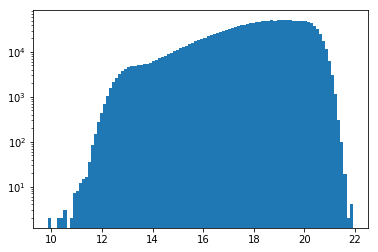

In [14]:
plt.hist(v_flux['vhs_m_ap_vista_ks'], bins=100)
plt.yscale('log')

In [15]:
np.sum(~np.isnan(v_flux['vhs_m_ap_vista_ks']))

1884373

In [16]:
import astropy.units as u

In [17]:
import astropy.units as u
for col in v_flux.colnames:
    if col.startswith('f'):
        v_flux[col] /= 1.E6
        v_flux[col].unit = u.Jansky


In [18]:
v_flux['vhs_ra'].unit = u.rad
v_flux['vhs_dec'].unit = u.rad
v_flux['vhs_ra'].convert_unit_to(u.rad)
v_flux['vhs_dec'].convert_unit_to(u.rad)
#v_flux['ra'].name = 'v_ra'
#v_flux['dec'].name = 'v_dec'

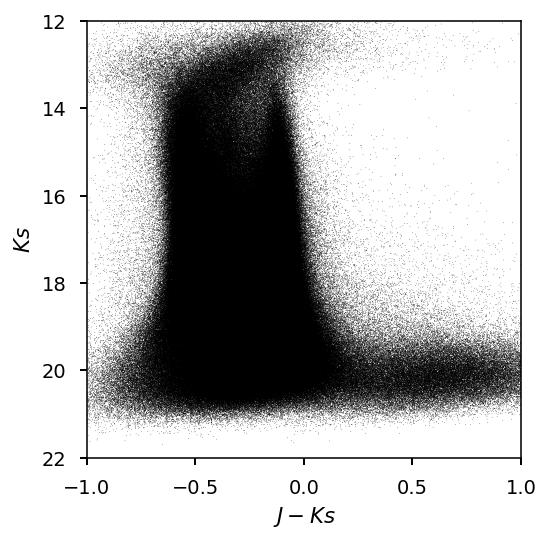

In [19]:

#selected = v_flux['f_vista_y'] / v_flux['ferr_vista_y'] > 5
#selected &= v_flux['f_vista_ks'] / v_flux['ferr_vista_ks'] > 5
plt.style.use('seaborn-notebook')
plt.figure(1, figsize=(4, 4), dpi=140)
plt.scatter(v_flux['vhs_m_ap_vista_j'] - v_flux['vhs_m_ap_vista_ks'],
            v_flux['vhs_m_ap_vista_ks'],
            edgecolors='None', s=0.01, c='k', rasterize=True)
plt.xlim(-1, 1)
plt.ylim(22, 12)
plt.xlabel('$J-Ks$')
plt.ylabel('$Ks$')
plt.subplots_adjust(left=0.125, bottom=0.1)
plt.show()

In [20]:
import logging
LOGGER = logging.getLogger(__name__)
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
from collections import Counter
from astropy.table import Table, Column, hstack, vstack
def merge_catalogues(cat_1, cat_2, racol_2, decol_2, radius=0.4*u.arcsec):
    """Merge two catalogues
    This function merges the second catalogue into the first one using the
    given radius to associate identical sources.  This function takes care to
    associate only one source of one catalogue to the other.  The sources that
    may be associated to various counterparts in the other catalogue are
    flagged as “maybe spurious association” with a true value in the
    flag_merged column.  If this column is present in the first catalogue, it's
    content is “inherited” during the merge.
    Parameters
    ----------
    cat_1: astropy.table.Table
        The table containing the first catalogue.  This is the master catalogue
        used during the merge.  If it has a “flag_merged” column it's content
        will be re-used in the flagging of the spurious merges.  This catalogue
        must contain a ‘ra’ and a ‘dec’ columns with the position in decimal
        degrees.
    cat_2: astropy.table.Table
        The table containing the second catalogue.
    racol_2: string
        Name of the column in the second table containing the right ascension
        in decimal degrees.
    decol_2: string
        Name of the column in the second table containing the declination in
        decimal degrees.
    radius: astropy.units.quantity.Quantity
        The radius to associate identical sources in the two catalogues.
    Returns
    -------
    astropy.table.Table
        The merged catalogue.
    """
    cat_1 = cat_1.copy()
    cat_2 = cat_2.copy()
    cat_1['ra'].unit = u.rad
    cat_1['dec'].unit = u.rad
    coords_1 = SkyCoord(cat_1['ra'], cat_1['dec'])

    
    cat_2[racol_2].unit = u.rad
    cat_2[decol_2].unit = u.rad
    coords_2 = SkyCoord(cat_2[racol_2], cat_2[decol_2])

    # Search for sources in second catalogue matching the sources in the first
    # one.
    idx_2, idx_1, d2d, _ = coords_1.search_around_sky(coords_2, radius)

    # We want to flag the possible mis-associations, i.e. the sources in each
    # catalogue that are associated to several sources in the other one, but
    # also all the sources that are associated to a problematic source in the
    # other catalogue (e.g. if two sources in the first catalogue are
    # associated to the same source in the second catalogue, they must be
    # flagged as potentially problematic).
    #
    # Search for duplicate associations
    toflag_idx_1 = np.unique([item for item, count in Counter(idx_1).items()
                              if count > 1])
    toflag_idx_2 = np.unique([item for item, count in Counter(idx_2).items()
                              if count > 1])
    # Flagging the sources associated to duplicates
    dup_associated_in_idx1 = np.in1d(idx_2, toflag_idx_2)
    dup_associated_in_idx2 = np.in1d(idx_1, toflag_idx_1)
    toflag_idx_1 = np.unique(np.concatenate(
        (toflag_idx_1, idx_1[dup_associated_in_idx1])
    ))
    toflag_idx_2 = np.unique(np.concatenate(
        (toflag_idx_2, idx_2[dup_associated_in_idx2])
    ))

    # Adding the flags to the catalogue.  In the second catalogue, the column
    # is named "flag_merged_2" and will be combined to the flag_merged column
    # one the merge is done.
    try:
        cat_1["flag_merged"] |= np.in1d(np.arange(len(cat_1), dtype=int),
                                        toflag_idx_1)
    except KeyError:
        cat_1.add_column(Column(
            data=np.in1d(np.arange(len(cat_1), dtype=int), toflag_idx_1),
            name="flag_merged"
        ))
    try:
        cat_2["flag_merged_2"] |= np.in1d(np.arange(len(cat_2), dtype=int), toflag_idx_2)
    except KeyError:
        cat_2.add_column(Column(
            data=np.in1d(np.arange(len(cat_2), dtype=int), toflag_idx_2),
            name="flag_merged_2"
        ))


    # Now that we have flagged the maybe spurious associations, we want to
    # associate each source of each catalogue to at most one source in the
    # other one.

    # We sort the indices by the distance to take the nearest counterparts in
    # the following steps.
    sort_idx = np.argsort(d2d)
    idx_1 = idx_1[sort_idx]
    idx_2 = idx_2[sort_idx]

    # These array will contain the indexes of the matching sources in both
    # catalogues.
    match_idx_1 = np.array([], dtype=int)
    match_idx_2 = np.array([], dtype=int)

    while len(idx_1) > 0:

        both_first_idx = np.sort(np.intersect1d(
            np.unique(idx_1, return_index=True)[1],
            np.unique(idx_2, return_index=True)[1],
        ))

        new_match_idx_1 = idx_1[both_first_idx]
        new_match_idx_2 = idx_2[both_first_idx]

        match_idx_1 = np.concatenate((match_idx_1, new_match_idx_1))
        match_idx_2 = np.concatenate((match_idx_2, new_match_idx_2))

        # We remove the matching sources in both catalogues.
        to_remove = (np.in1d(idx_1, new_match_idx_1) |
                     np.in1d(idx_2, new_match_idx_2))
        idx_1 = idx_1[~to_remove]
        idx_2 = idx_2[~to_remove]

    # Indices of un-associated object in both catalogues.
    unmatched_idx_1 = np.delete(np.arange(len(cat_1), dtype=int),match_idx_1)
    unmatched_idx_2 = np.delete(np.arange(len(cat_2), dtype=int),match_idx_2)

    # Sources only in cat_1
    only_in_cat_1 = cat_1[unmatched_idx_1]

    # Sources only in cat_2
    only_in_cat_2 = cat_2[unmatched_idx_2]
    # We are using the ra and dec columns from cat_2 for the position.
    only_in_cat_2[racol_2].name = "ra"
    only_in_cat_2[decol_2].name = "dec"

    # Merged table of sources in both catalogues.
    both_in_cat_1_and_cat_2 = hstack([cat_1[match_idx_1], cat_2[match_idx_2]])
    # We don't need the positions from the second catalogue anymore.
    both_in_cat_1_and_cat_2.remove_columns([racol_2, decol_2])

    # Logging the number of rows
    LOGGER.info("There are %s sources only in the first catalogue",
                len(only_in_cat_1))
    LOGGER.info("There are %s sources only in the second catalogue",
                len(only_in_cat_2))
    LOGGER.info("There are %s sources in both catalogues",
                len(both_in_cat_1_and_cat_2))

    merged_catalogue = vstack([only_in_cat_1, both_in_cat_1_and_cat_2,
                               only_in_cat_2])

    # When vertically stacking the catalogues, some values in the flag columns
    # are masked because they did not exist in the catalogue some row originate
    # from. We must set them to the appropriate value.
    for colname in merged_catalogue.colnames:
        if 'flag' in colname:
            merged_catalogue[colname][merged_catalogue[colname].mask] = False

    # We combined the flag_merged flags
    merged_catalogue['flag_merged'] |= merged_catalogue['flag_merged_2']
    merged_catalogue.remove_column('flag_merged_2')
    merged_catalogue.remove_column('flag_merged')
    return merged_catalogue

In [21]:
r_cat = Table.read("../dmu0/dmu0_PanStarrs/data/ps1_pv3_3pi_20170110_GmagLT19/133200.fits")

In [23]:
#VHS REF CAT
n=0
for c in ps_refcats:
    r_cat = Table.read("../dmu0/dmu0_PanStarrs/data/ps1_pv3_3pi_20170110/{}.fits".format(c))
    r_cat['coord_ra'].name = 'ra'
    r_cat['coord_dec'].name = 'dec'
    merge = merge_catalogues(r_cat, v_flux, 'vhs_ra', 'vhs_dec', radius=0.4*u.arcsec)
    merge=clean_table(merge)
    has_both  = (
        (merge['g_flux'] >0.)
        # &(merge['vhs_m_ap_vista_ks']>0.) #Take all panstarrs objects
    )
    merge = merge[has_both]
    if np.sum(merge['vhs_m_ap_vista_ks']>0.) == 0:
        print('No VHS Objects in ', c)
        continue
    n+=1
    merge['ra'].name = 'coord_ra'
    merge['dec'].name = 'coord_dec'
    #convert rad to degs?
    merge['coord_ra'] = (180./np.pi)*merge['coord_ra']
    merge['coord_ra'].unit = u.deg
    merge['coord_dec'] = (180./np.pi)*merge['coord_dec']
    merge['coord_dec'].unit = u.deg
    merge['pm_ra_err'].name = 'pm_raErr'
    merge['pm_dec_err'].name = 'pm_decErr'
    try:
        merge['coord_raErr'] = (180./np.pi)*merge['coord_ra_err']
        merge['coord_raErr'].unit = u.deg
        merge['coord_decErr'] = (180./np.pi)*merge['coord_dec_err']
        merge['coord_decErr'].unit = u.deg
        merge.remove_columns['coord_ra_err', 'coord_dec_err']
    except:
        merge['coord_raErr'] = (180./np.pi)*merge['coord_raErr']
        merge['coord_raErr'].unit = u.deg
        merge['coord_decErr'] = (180./np.pi)*merge['coord_decErr']
        merge['coord_decErr'].unit = u.deg
    #flags col only in James Mulaney 19 cut cat
    #merge['flags'].format = '1X'
    merge['epoch'] = merge['epoch'].astype('int32')
    #merge[has_both].write('./data/refcats/{}.fits'.format(c), overwrite=True)
    
    for col in merge.colnames:
        #go through every flux column and convert to mags and rename
        if col.endswith('_flux'):
            err_col = col + 'Sigma'
            mag = abMagFromFlux(merge[col])
            mag_err = abMagErrFromFluxErr(merge[err_col],merge[col])
            merge[col] = mag
            merge[col].name = col[:-5]
            merge[err_col] = mag_err
            merge[err_col].name = err_col.replace('fluxSigma','err')
        #Go through every vhs mag col and rename
        if col.startswith('vhs_m_'):
            merge[col].name =col.split('_')[-1]
            merge[col.replace('vhs_m_', 'vhs_merr_')].name =  col.split('_')[-1] + '_err'
    if len(merge) == 0:
        print('No Objects in ', c)
        continue
    merge.remove_columns(['vhs_stellarity', 'vhs_id'])
    merge.write('./data/ref_cats_vhs/{}.fits'.format(c), overwrite=True)
    print("Shard {} has {} objects and {} VHS mags.".format(c, len(merge), np.sum(~np.isnan(merge['ks']))))


Shard 188416 has 13405 objects and 858 VHS mags.
No VHS Objects in  131073
Shard 188418 has 13134 objects and 860 VHS mags.
Shard 188417 has 13468 objects and 908 VHS mags.
No VHS Objects in  131076
Shard 188421 has 11681 objects and 829 VHS mags.
No VHS Objects in  131078
No VHS Objects in  131079
Shard 188424 has 13475 objects and 776 VHS mags.
Shard 188425 has 13526 objects and 810 VHS mags.
Shard 188426 has 13765 objects and 718 VHS mags.
Shard 188427 has 13221 objects and 827 VHS mags.
Shard 188428 has 11593 objects and 883 VHS mags.
Shard 188429 has 13686 objects and 802 VHS mags.
Shard 133517 has 13073 objects and 478 VHS mags.
Shard 188431 has 13313 objects and 785 VHS mags.
No VHS Objects in  131084
No VHS Objects in  188433
No VHS Objects in  131086
No VHS Objects in  131087
Shard 188436 has 12800 objects and 808 VHS mags.
Shard 188437 has 11674 objects and 809 VHS mags.
Shard 188438 has 10718 objects and 735 VHS mags.
No VHS Objects in  198962
Shard 188439 has 11766 objects 

Shard 196816 has 14525 objects and 820 VHS mags.
Shard 196817 has 12575 objects and 977 VHS mags.
Shard 196818 has 11189 objects and 930 VHS mags.
Shard 196819 has 12358 objects and 866 VHS mags.
Shard 188628 has 13140 objects and 41 VHS mags.
No VHS Objects in  188629
No VHS Objects in  188630
Shard 133557 has 13296 objects and 446 VHS mags.
No VHS Objects in  188631
Shard 196822 has 12072 objects and 5 VHS mags.
No VHS Objects in  196824
Shard 196825 has 11546 objects and 2 VHS mags.
No VHS Objects in  196828
Shard 196829 has 12660 objects and 68 VHS mags.
Shard 196830 has 14756 objects and 74 VHS mags.
No VHS Objects in  198970
No VHS Objects in  196831
No VHS Objects in  196826
No VHS Objects in  196827
Shard 188640 has 10162 objects and 788 VHS mags.
Shard 188641 has 12618 objects and 910 VHS mags.
No VHS Objects in  188642
Shard 188643 has 11342 objects and 668 VHS mags.
Shard 188644 has 13493 objects and 900 VHS mags.
Shard 188645 has 11845 objects and 800 VHS mags.
Shard 188646

Shard 188862 has 13778 objects and 778 VHS mags.
No VHS Objects in  188871
Shard 188863 has 12981 objects and 799 VHS mags.
No VHS Objects in  188870
Shard 254416 has 13185 objects and 806 VHS mags.
Shard 254417 has 14791 objects and 774 VHS mags.
Shard 254418 has 14705 objects and 828 VHS mags.
Shard 254419 has 13892 objects and 724 VHS mags.
No VHS Objects in  254420
No VHS Objects in  254421
No VHS Objects in  254422
No VHS Objects in  254423
No VHS Objects in  254424
No VHS Objects in  254425
No VHS Objects in  254426
No VHS Objects in  254427
No VHS Objects in  254428
Shard 254429 has 13909 objects and 5 VHS mags.
Shard 254430 has 16459 objects and 3 VHS mags.
No VHS Objects in  254431
Shard 188887 has 11240 objects and 769 VHS mags.
Shard 188888 has 14014 objects and 814 VHS mags.
Shard 188889 has 11767 objects and 917 VHS mags.
No VHS Objects in  255727
Shard 188891 has 12610 objects and 904 VHS mags.
Shard 188892 has 11794 objects and 901 VHS mags.
Shard 188893 has 11650 object

Shard 131813 has 12012 objects and 568 VHS mags.
Shard 131814 has 12790 objects and 585 VHS mags.
Shard 131815 has 12839 objects and 571 VHS mags.
Shard 131816 has 13014 objects and 584 VHS mags.
Shard 131817 has 13580 objects and 539 VHS mags.
Shard 131818 has 12016 objects and 568 VHS mags.
Shard 131819 has 12470 objects and 506 VHS mags.
Shard 131820 has 12691 objects and 519 VHS mags.
Shard 131821 has 12690 objects and 615 VHS mags.
Shard 131822 has 13559 objects and 548 VHS mags.
Shard 131823 has 12652 objects and 584 VHS mags.
Shard 131824 has 14003 objects and 173 VHS mags.
Shard 131825 has 11672 objects and 166 VHS mags.
No VHS Objects in  131826
Shard 131827 has 12583 objects and 12 VHS mags.
Shard 131828 has 12802 objects and 158 VHS mags.
No VHS Objects in  131829
Shard 131830 has 11359 objects and 201 VHS mags.
Shard 131831 has 13278 objects and 23 VHS mags.
No VHS Objects in  197359
No VHS Objects in  131836
No VHS Objects in  131837
Shard 131838 has 11619 objects and 20 V

Shard 156818 has 13209 objects and 1318 VHS mags.
Shard 156819 has 13671 objects and 1255 VHS mags.
Shard 255133 has 14554 objects and 682 VHS mags.
Shard 255134 has 12891 objects and 647 VHS mags.
Shard 255135 has 13343 objects and 435 VHS mags.
No VHS Objects in  238751
Shard 156824 has 14240 objects and 1224 VHS mags.
Shard 156825 has 12764 objects and 1393 VHS mags.
Shard 156826 has 15241 objects and 1277 VHS mags.
Shard 156827 has 12247 objects and 1288 VHS mags.
Shard 156828 has 13288 objects and 1349 VHS mags.
Shard 156829 has 13791 objects and 1317 VHS mags.
Shard 156830 has 14029 objects and 1395 VHS mags.
Shard 156831 has 13619 objects and 1361 VHS mags.
No VHS Objects in  156836
No VHS Objects in  156837
No VHS Objects in  156838
No VHS Objects in  156839
No VHS Objects in  156840
No VHS Objects in  156841
No VHS Objects in  156842
No VHS Objects in  156843
No VHS Objects in  156844
No VHS Objects in  156845
No VHS Objects in  156846
No VHS Objects in  156847
Shard 156848 ha

Shard 157263 has 11239 objects and 1079 VHS mags.
No VHS Objects in  255559
Shard 255560 has 14827 objects and 816 VHS mags.
Shard 255561 has 12546 objects and 345 VHS mags.
Shard 255562 has 14834 objects and 770 VHS mags.
No VHS Objects in  157268
No VHS Objects in  157269
No VHS Objects in  157270
No VHS Objects in  157271
No VHS Objects in  157272
No VHS Objects in  157273
No VHS Objects in  157274
No VHS Objects in  157275
No VHS Objects in  157276
No VHS Objects in  157277
No VHS Objects in  157278
No VHS Objects in  157279
Shard 157280 has 11272 objects and 979 VHS mags.
Shard 157281 has 13259 objects and 1042 VHS mags.
Shard 157282 has 13607 objects and 1031 VHS mags.
Shard 157283 has 12638 objects and 959 VHS mags.
Shard 157284 has 11980 objects and 1096 VHS mags.
Shard 157285 has 12925 objects and 1058 VHS mags.
Shard 157286 has 12052 objects and 1075 VHS mags.
Shard 157287 has 11905 objects and 1055 VHS mags.
Shard 157288 has 15083 objects and 1088 VHS mags.
Shard 157289 has 

Shard 231424 has 13774 objects and 10 VHS mags.
No VHS Objects in  231426
No VHS Objects in  231427
Shard 231428 has 14146 objects and 2 VHS mags.
No VHS Objects in  231429
Shard 231430 has 13697 objects and 9 VHS mags.
No VHS Objects in  231431
Shard 156718 has 14822 objects and 1456 VHS mags.
Shard 149506 has 13805 objects and 1498 VHS mags.
Shard 231425 has 14683 objects and 8 VHS mags.
No VHS Objects in  133124
No VHS Objects in  231436
Shard 156719 has 13920 objects and 1410 VHS mags.
No VHS Objects in  133125
No VHS Objects in  133127
Shard 149512 has 14374 objects and 1535 VHS mags.
Shard 149513 has 14340 objects and 1226 VHS mags.
Shard 149514 has 13522 objects and 1736 VHS mags.
Shard 149515 has 14915 objects and 1318 VHS mags.
No VHS Objects in  231437
No VHS Objects in  231438
No VHS Objects in  231439
Shard 231440 has 14874 objects and 3 VHS mags.
No VHS Objects in  231441
Shard 231442 has 14197 objects and 6 VHS mags.
No VHS Objects in  231450
No VHS Objects in  231451
No 

Shard 133327 has 12411 objects and 698 VHS mags.
Shard 133328 has 14412 objects and 454 VHS mags.
Shard 133329 has 13172 objects and 748 VHS mags.
Shard 133330 has 14870 objects and 632 VHS mags.
Shard 133331 has 13799 objects and 637 VHS mags.
Shard 133332 has 16487 objects and 429 VHS mags.
Shard 133333 has 12757 objects and 664 VHS mags.
Shard 133334 has 12520 objects and 420 VHS mags.
Shard 133335 has 13038 objects and 676 VHS mags.
Shard 133336 has 13998 objects and 341 VHS mags.
Shard 133337 has 13552 objects and 614 VHS mags.
Shard 133338 has 13043 objects and 739 VHS mags.
Shard 133339 has 13789 objects and 764 VHS mags.
Shard 133340 has 12414 objects and 526 VHS mags.
Shard 133341 has 14269 objects and 486 VHS mags.
Shard 133342 has 11754 objects and 887 VHS mags.
Shard 133343 has 13152 objects and 626 VHS mags.
No VHS Objects in  231648
No VHS Objects in  231649
No VHS Objects in  231650
No VHS Objects in  231651
Shard 133344 has 13092 objects and 737 VHS mags.
Shard 133345 h

Shard 133549 has 12973 objects and 607 VHS mags.
Shard 133550 has 12080 objects and 470 VHS mags.
No VHS Objects in  231864
Shard 156804 has 13028 objects and 1185 VHS mags.
No VHS Objects in  231865
No VHS Objects in  231866
No VHS Objects in  231867
Shard 133556 has 13380 objects and 529 VHS mags.
Shard 156805 has 13017 objects and 1130 VHS mags.
Shard 133558 has 15906 objects and 636 VHS mags.
Shard 133559 has 14536 objects and 590 VHS mags.
Shard 133560 has 14250 objects and 858 VHS mags.
Shard 133561 has 13174 objects and 252 VHS mags.
Shard 156806 has 12207 objects and 1125 VHS mags.
Shard 133563 has 12873 objects and 701 VHS mags.
Shard 133564 has 11550 objects and 679 VHS mags.
Shard 133565 has 13869 objects and 286 VHS mags.
Shard 133575 has 13221 objects and 661 VHS mags.
No VHS Objects in  133576
Shard 133577 has 14005 objects and 276 VHS mags.
Shard 133578 has 15437 objects and 74 VHS mags.
Shard 156807 has 13017 objects and 1140 VHS mags.
Shard 133571 has 13933 objects and

Shard 134057 has 14052 objects and 366 VHS mags.
Shard 134058 has 11906 objects and 551 VHS mags.
Shard 134059 has 15853 objects and 587 VHS mags.
Shard 134060 has 11747 objects and 99 VHS mags.
Shard 134061 has 13593 objects and 319 VHS mags.
Shard 134062 has 11704 objects and 486 VHS mags.
Shard 134063 has 13020 objects and 534 VHS mags.
Shard 134064 has 13238 objects and 273 VHS mags.
Shard 134065 has 13052 objects and 385 VHS mags.
Shard 134066 has 13599 objects and 97 VHS mags.
Shard 134067 has 12554 objects and 480 VHS mags.
Shard 134068 has 13750 objects and 490 VHS mags.
Shard 134069 has 14200 objects and 477 VHS mags.
Shard 134070 has 14218 objects and 635 VHS mags.
Shard 134071 has 15896 objects and 716 VHS mags.
Shard 134072 has 12923 objects and 600 VHS mags.
Shard 134073 has 14215 objects and 460 VHS mags.
Shard 134074 has 16134 objects and 725 VHS mags.
Shard 134075 has 15747 objects and 434 VHS mags.
Shard 134076 has 15170 objects and 710 VHS mags.
Shard 134077 has 13449

Shard 199058 has 17297 objects and 1918 VHS mags.
No VHS Objects in  131072
No VHS Objects in  131074
No VHS Objects in  131075
No VHS Objects in  131077
Shard 199059 has 15276 objects and 1739 VHS mags.
No VHS Objects in  131085
No VHS Objects in  199127
No VHS Objects in  199128
No VHS Objects in  199129
No VHS Objects in  199130
No VHS Objects in  199060
No VHS Objects in  199131
No VHS Objects in  199132
No VHS Objects in  199133
No VHS Objects in  199134
No VHS Objects in  199135
No VHS Objects in  199061
No VHS Objects in  131130
No VHS Objects in  238627
Shard 238628 has 14257 objects and 4 VHS mags.
No VHS Objects in  173092
No VHS Objects in  199553
No VHS Objects in  199556
No VHS Objects in  199558
No VHS Objects in  199559
No VHS Objects in  238637
No VHS Objects in  238638
No VHS Objects in  173094
No VHS Objects in  238639
No VHS Objects in  199566
No VHS Objects in  238644
No VHS Objects in  238645
No VHS Objects in  238646
No VHS Objects in  238647
Shard 173098 has 1287

No VHS Objects in  189996
No VHS Objects in  255126
No VHS Objects in  189997
No VHS Objects in  255127
No VHS Objects in  189998
Shard 255128 has 11921 objects and 636 VHS mags.
No VHS Objects in  189999
Shard 255129 has 12560 objects and 510 VHS mags.
Shard 190000 has 15102 objects and 1188 VHS mags.
Shard 255130 has 14626 objects and 692 VHS mags.
Shard 190001 has 13093 objects and 1189 VHS mags.
Shard 255131 has 11845 objects and 751 VHS mags.
Shard 190002 has 13951 objects and 1238 VHS mags.
Shard 255132 has 13619 objects and 613 VHS mags.
Shard 190003 has 15077 objects and 1212 VHS mags.
Shard 190004 has 15132 objects and 1154 VHS mags.
Shard 190005 has 15280 objects and 1414 VHS mags.
Shard 190006 has 14673 objects and 1288 VHS mags.
Shard 190007 has 15677 objects and 1383 VHS mags.
Shard 190008 has 15261 objects and 1728 VHS mags.
Shard 190009 has 13475 objects and 1623 VHS mags.
Shard 190010 has 16636 objects and 1582 VHS mags.
Shard 190011 has 15253 objects and 1768 VHS mags.

Shard 196651 has 13525 objects and 3 VHS mags.
Shard 196652 has 13137 objects and 857 VHS mags.
Shard 196653 has 12186 objects and 938 VHS mags.
Shard 196654 has 13220 objects and 966 VHS mags.
Shard 196655 has 12690 objects and 864 VHS mags.
No VHS Objects in  196656
No VHS Objects in  196657
No VHS Objects in  196658
No VHS Objects in  196659
Shard 196660 has 13491 objects and 755 VHS mags.
Shard 196661 has 12741 objects and 885 VHS mags.
Shard 196662 has 14604 objects and 820 VHS mags.
Shard 196663 has 12920 objects and 743 VHS mags.
No VHS Objects in  196664
No VHS Objects in  196665
Shard 196666 has 14474 objects and 2 VHS mags.
No VHS Objects in  196667
No VHS Objects in  133167
Shard 196668 has 13837 objects and 83 VHS mags.
Shard 133168 has 14171 objects and 247 VHS mags.
No VHS Objects in  196669
Shard 133169 has 12518 objects and 277 VHS mags.
Shard 196670 has 14225 objects and 90 VHS mags.
Shard 133170 has 12771 objects and 555 VHS mags.
No VHS Objects in  133174
No VHS Obje

Shard 188678 has 14571 objects and 1173 VHS mags.
Shard 149601 has 14753 objects and 2007 VHS mags.
No VHS Objects in  196820
Shard 188679 has 13984 objects and 1243 VHS mags.
Shard 149602 has 14067 objects and 2174 VHS mags.
No VHS Objects in  196821
Shard 188680 has 14494 objects and 1465 VHS mags.
Shard 149603 has 14556 objects and 2015 VHS mags.
Shard 149604 has 15281 objects and 1906 VHS mags.
No VHS Objects in  196823
Shard 149605 has 15554 objects and 1765 VHS mags.
Shard 188683 has 14139 objects and 1311 VHS mags.
No VHS Objects in  165888
Shard 149606 has 14450 objects and 2111 VHS mags.
Shard 149607 has 15446 objects and 1784 VHS mags.
No VHS Objects in  165890
Shard 149608 has 15958 objects and 2388 VHS mags.
No VHS Objects in  165891
Shard 149609 has 14979 objects and 2366 VHS mags.
Shard 149610 has 15373 objects and 2400 VHS mags.
Shard 149611 has 15358 objects and 2418 VHS mags.
Shard 149612 has 14486 objects and 2048 VHS mags.
Shard 149613 has 14985 objects and 2205 VHS 

Shard 255586 has 14128 objects and 677 VHS mags.
Shard 255587 has 13915 objects and 420 VHS mags.
Shard 255588 has 15888 objects and 675 VHS mags.
No VHS Objects in  253960
Shard 255589 has 16935 objects and 394 VHS mags.
No VHS Objects in  253961
Shard 255590 has 16133 objects and 453 VHS mags.
No VHS Objects in  253962
No VHS Objects in  149756
No VHS Objects in  198953
Shard 255591 has 16923 objects and 676 VHS mags.
No VHS Objects in  253963
No VHS Objects in  149757
No VHS Objects in  255592
No VHS Objects in  253964
No VHS Objects in  149758
No VHS Objects in  255593
No VHS Objects in  253965
No VHS Objects in  149759
No VHS Objects in  255594
No VHS Objects in  253966
No VHS Objects in  255595
No VHS Objects in  253967
No VHS Objects in  198954
Shard 255596 has 13766 objects and 641 VHS mags.
Shard 255597 has 13884 objects and 333 VHS mags.
Shard 255598 has 14863 objects and 769 VHS mags.
Shard 255599 has 15342 objects and 820 VHS mags.
No VHS Objects in  255600
No VHS Objects i

In [ ]:
n/len(ps_refcats)